In [2]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline
from scipy.integrate import *

In [3]:
def f(x):
    return 3.0*(x**2) + 1.0

I, err = quad(f,0,1) #взяли интеграл f(x) от 0 до 1

In [4]:
print I
print err

2.0
2.22044604925e-14


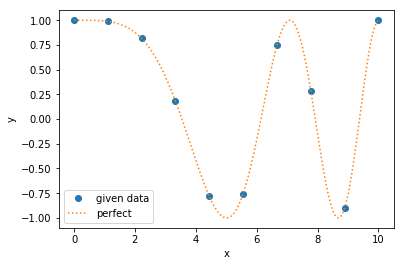

In [5]:
x_given = np.linspace(0,10,10)
y_given = np.cos (x_given**2.0/8.0)

xx = np.linspace(0,10,1000)
yy = np.cos (xx**2.0/8.0)

plt.plot(x_given, y_given,'o', label = 'given data') 
plt.plot(xx, yy,':', label = 'perfect')

plt.ylabel ('y')
plt.xlabel ('x')

plt.legend (loc= 'best')

Text(0.5,0,u'x')

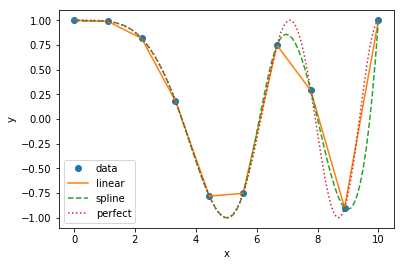

In [6]:
from scipy.interpolate import interp1d

x_i = np.linspace (0,10,100)

#линейная интеполяция
f_linear = interp1d (x_given, y_given)
y_il = f_linear (x_i)

#интерполяция кубическими сплайнами
f_spline = interp1d (x_given, y_given, kind = 'cubic')
y_is = f_spline (x_i)

plt.plot(x_given, y_given,'o')
plt.plot(x_i, y_il,'-')
plt.plot(x_i, y_is,'--')
plt.plot(xx, yy,':')

plt.legend(['data','linear','spline','perfect'],loc='best')

plt.ylabel ('y')
plt.xlabel ('x')

Text(0.5,0,u'x')

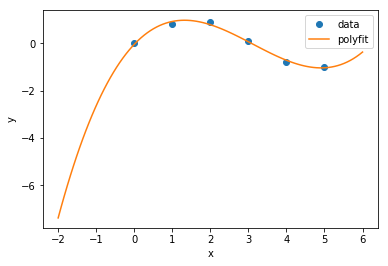

In [7]:
x_given = np.array ([0., 1., 2., 3., 4., 5.])
y_given = np.array ([0., 0.8, 0.9, 0.1, -0.8, -1.0])

x_p = np.linspace (-2.,6.0, 100)

#Создаём полином 3 степени из данных массива
p3 = np.polyfit (x_given, y_given, 3)
y_p = np.polyval (p3, x_p)

plt.plot(x_given, y_given,'o')
plt.plot(x_p, y_p,'-')

plt.legend(['data','polyfit'],loc='best')

plt.ylabel ('y')
plt.xlabel ('x')

Text(0.5,0,u'x')

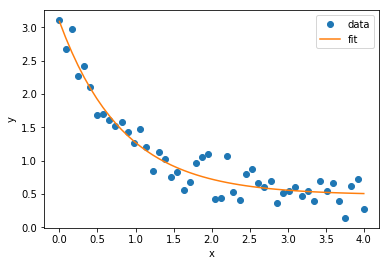

In [8]:
from scipy.optimize import *

def f(x,a,b,c):
    return a*np.exp(-b*x) + c

x_given = np.linspace (0,4,50)
y_given = f(x_given,2.5,1.3,0.5) + 0.2*np.random.normal (size = len(x_given))

params, extras = curve_fit (f, x_given, y_given)

plt.plot(x_given, y_given,'o')
plt.plot(x_given, f(x_given, params[0], params [1], params [2]))

plt.legend(['data','fit'],loc='best')

plt.ylabel ('y')
plt.xlabel ('x')